<a href="https://colab.research.google.com/github/datascientist-hist/Convolutiona-Neural-Network-Explanation/blob/main/Spam_Messages_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare environment and dataset

In [5]:
! pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.figure_factory as ff
import wordcloud
import nltk
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('Spam_Classification.csv')


In [8]:
data.shape

(5572, 2)

In [9]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [10]:

y=data['Category']
newdata=data.drop('Category',axis=1)
X_train, X_val, y_train, y_val = train_test_split(newdata, y, test_size=0.25, stratify=y)

In [11]:
data.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [12]:
data['Category'].value_counts().to_dict()

{'ham': 4825, 'spam': 747}

In [13]:
fig = px.histogram(data, x="Category", color="Category",
                   color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()

The dataset is unbalanced, we can observe that there are:
- 747 observations as Spam
- 4825 observations as ham

#Feature Engineering

I am going to perform a cleaning of the dataset and then adding some feature like:
- length text


In [14]:
data['length'] = data['Message'].apply(len)
data.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Here we will observe if there are difference in length between email spam and not

In [15]:

lis=[data.length[data['Category']=='ham'], data.length[data['Category']=='spam']]
group_labels=['ham','spam']
colors = ['#003f5c', '#ffa600']
# Create distplot 
fig = ff.create_distplot(lis, group_labels, bin_size=20,show_rug=False,
                         curve_type='kde', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(xaxis_range=[0,300])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [22]:

mean_spam=data.length[data['Category']=='spam'].mean()
mean_ham=data.length[data['Category']=='ham'].mean()
sd_spam=data.length[data['Category']=='spam'].std()
sd_ham=data.length[data['Category']=='ham'].std()
print('the average length for spam is :',round(mean_spam,2),'with standard deviation :',sd_spam)
print('the average length for ham is :',round(mean_ham,2),'with standard deviation :',sd_ham)

the average length for spam is : 137.99 with standard deviation : 29.9802865150208
the average length for ham is : 71.45 with standard deviation : 58.4348642857575


Now to better understand the dataset i will compute the most frequency words for the categories to do that i am going to use Wìword cloud library that provides an image,let's see

In [23]:
#dividing the dataset
data_ham  = data[data['Category']=='ham'].copy()
data_spam = data[data['Category']=='spam'].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['Message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

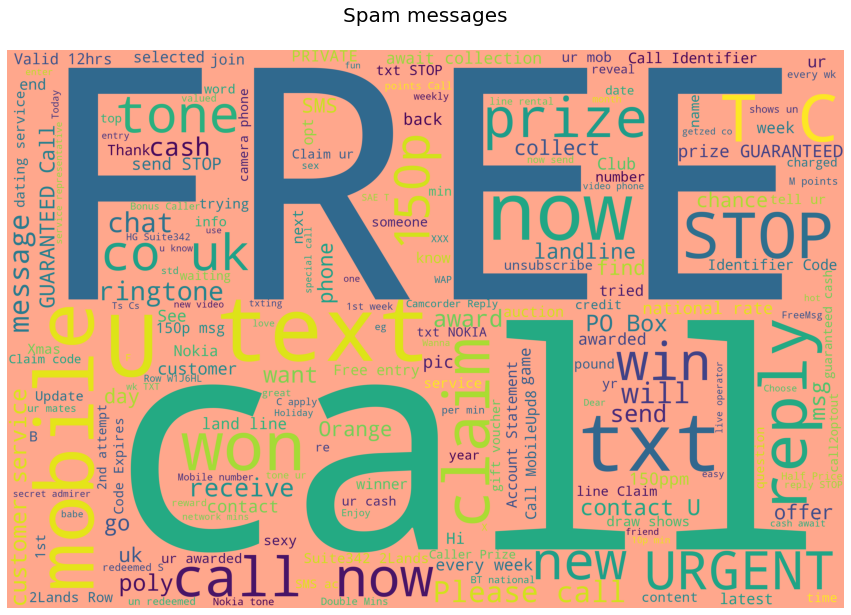

In [25]:
#create the image for Spam messages
show_wordcloud(data_spam, "Spam messages\n")

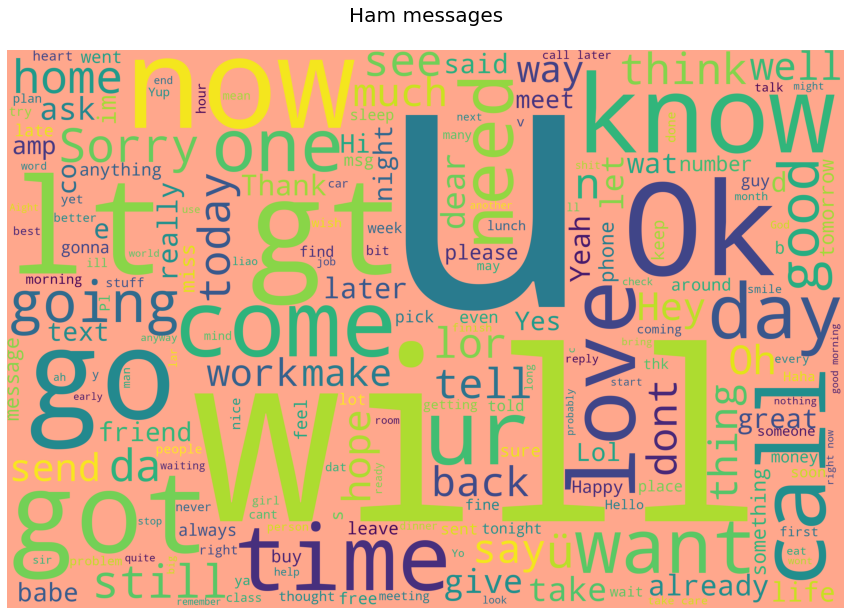

In [26]:
#create the image for Ham messages
show_wordcloud(data_ham, "Ham messages\n")